<a href="https://colab.research.google.com/github/HUJameson/Colab/blob/main/aillm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

Mounted at /content/drive


In [ ]:
import openai
from sk_utils import read_sk

openai.api_key = read_sk()

openai.Model.list()

In [4]:
import openai
COMPLETION_MODEL = "text-davinci-003"

prompt = """
Consideration product : 工厂现货PVC充气青蛙夜市地摊热卖充气玩具发光蛙儿童水上玩具

1. Compose human readable product title used on Amazon in english within 20 words.
2. Write 5 selling points for the products in Amazon.
3. Evaluate a price range for this product in U.S.

Output the result in json format with three properties called title, selling_points and price_range
"""

def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,
    )
    message = completions.choices[0].text
    return message

print(get_response(prompt))


{
    "title": "PVC Inflatable Glow-in-the-Dark Frog Water Toy for Kids Night Market Stall Hot Sale",
    "selling_points": [
        "Made of durable PVC material",
        "Inflatable design for easy storage and transport",
        "Glow-in-the-dark feature for night time fun",
        "Perfect for water play and pool parties",
        "Great for kids of all ages"
    ],
    "price_range": "$10 - $20"
}


In [5]:
import openai

COMPLETION_MODEL = "gpt-3.5-turbo"
#COMPLETION_MODEL = "gpt-4"

prompt = """
Consideration product : 工厂现货PVC充气青蛙夜市地摊热卖充气玩具发光蛙儿童水上玩具

1. Compose human readable product title used on Amazon in english within 20 words.
2. Write 5 selling points for the products in Amazon.
3. Evaluate a price range for this product in U.S.

Output the result in json format with three properties called title, selling_points and price_range
"""

def get_response(prompt):
    completion = openai.ChatCompletion.create(
        model = COMPLETION_MODEL,
        messages = [
            {'role': 'user', 'content': prompt}
        ],
        temperature = 0
    )
    message = completion['choices'][0]['message']['content']
    return message

print(get_response(prompt))


{
  "title": "Factory Stock PVC Inflatable Frog Night Market Hot Selling Inflatable Toy Glowing Frog Children's Water Toy",
  "selling_points": [
    "High quality PVC material",
    "Inflatable and easy to use",
    "Glow in the dark feature",
    "Perfect for water play",
    "Suitable for both kids and adults"
  ],
  "price_range": "$10 - $20"
}


In [6]:
prompt = """
Man Utd must win trophies, says Ten Hag ahead of League Cup final

请将上面这句话的人名提取出来，并用json的方式展示出来
"""

print(get_response(prompt))

{
  "name": "Ten Hag"
}


In [8]:
!pip install readability-lxml

In [9]:
import requests
from readability import Document
import openai


def get_webpage_content(url):
    # 发送GET请求获取网页内容
    response = requests.get(url)
    html = response.content

    # 使用readability库提取网页正文内容
    doc = Document(html)
    content = doc.summary()

    return content

def generate_summary(text):
    # 调用Open AI的API生成摘要
    response = openai.Completion.create(
        engine="davinci",
        prompt=text,
        max_tokens=100,
        temperature=0.7,
        n=1,
        stop=None
    )
    summary = response.choices[0].text.strip()

    return summary

# 输入URL
url = "https://zhuanlan.zhihu.com/p/611905895"

# 获取网页内容
#content = get_webpage_content(url)
content="""当你走进这欢乐场
背上所有的梦与想
各色的脸上各色的妆
没人记得你的模样

三巡酒过你在角落
固执的唱着苦涩的歌
听它在喧嚣里被淹没
你拿起酒杯对自己说

一杯敬朝阳 一杯敬月光
唤醒我的向往 温柔了寒窗
于是可以不回头地逆风飞翔
不怕心头有雨 眼底有霜

一杯敬故乡 一杯敬远方
守着我的善良 催着我成长
所以南北的路从此不再漫长
灵魂不再无处安放

躁动不安的座上客
自以为是地表演着
伪装着 舞蹈着 疲惫着
你拿起酒杯对自己说
一杯敬朝阳 一杯敬月光
唤醒我的向往 温柔了寒窗
于是可以不回头地逆风飞翔
不怕心头有雨 眼底有霜

一杯敬故乡 一杯敬远方
守着我的善良 催着我成长
所以南北的路从此不再漫长
灵魂不再无处安放

一杯敬明天 一杯敬过往
支撑我的身体 厚重了肩膀
虽然从不相信所谓山高水长
人生苦短何必念念不忘

一杯敬自由 一杯敬死亡
宽恕我的平凡 驱散了迷惘
好吧天亮之后总是潦草离场
清醒的人最荒唐
清醒的人最荒唐"""

# 生成摘要
summary = generate_summary(content)

# 打印摘要
print("摘要：", summary)

摘要： 一杯敬美好 一杯敬平凡
一杯敬世界 一杯敬自由
一杯敬朝阳 一杯敬月光
一杯敬故乡 一杯敬远方

还在继续今天的


In [ ]:
import openai
from openai.embeddings_utils import cosine_similarity, get_embedding

# 选择使用最小的ada模型
EMBEDDING_MODEL = "text-embedding-ada-002"

# 获取"好评"和"差评"的
positive_review = get_embedding("好评")
negative_review = get_embedding("差评")

positive_example = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质")
negative_example = get_embedding("降价厉害，保价不合理，不推荐")

def get_score(sample_embedding):
  return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)

positive_score = get_score(positive_example)
negative_score = get_score(negative_example)

print("好评例子的评分 : %f" % (positive_score))
print("差评例子的评分 : %f" % (negative_score))

In [ ]:
good_restraurant = get_embedding("这家餐馆太好吃了，一点都不糟糕")
bad_restraurant = get_embedding("这家餐馆太糟糕了，一点都不好吃")

good_score = get_score(good_restraurant)
bad_score = get_score(bad_restraurant)
print("好评餐馆的评分 : %f" % (good_score))
print("差评餐馆的评分 : %f" % (bad_score))

好评餐馆的评分 : 0.062224
差评餐馆的评分 : -0.073712


<ipython-input-23-2c3ff778fd94>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



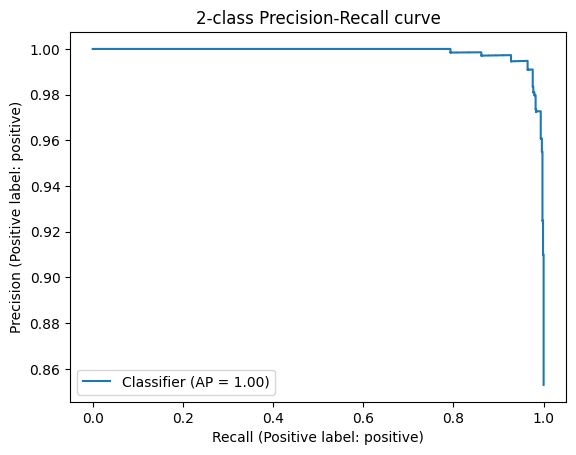

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'],
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])

In [ ]:
import openai

COMPLETION_MODEL = "text-davinci-003"

prompt = '请你用朋友的语气回复给到客户，并称他为“亲”，他的订单已经发货在路上了，预计在3天之内会送达，订单号2021AEDG，我们很抱歉因为天气的原因物流时间比原来长，感谢他选购我们的商品。'

def get_response(prompt, temperature = 1.0, stop = None):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,
    )
    message = completions.choices[0].text
    return message

print(get_response(prompt))



亲，您的订单（2021AEDG）已经发出了，预计3天之内就能送达，我们非常抱歉因为天气原因物流受到影响，但我们会确保最快时间快递给您，感谢您选购我们的商品，如有其他问题，请随时联系我们。


In [ ]:
print(get_response(prompt))



亲，您的订单2021AEDG已经发货，预计会在3天内送达。由于天气造成的物流延误，我们深表歉意，期待早日您收到商品之后的愉快体验。谢谢您选购我们的商品，我们将竭诚为您服务。


In [ ]:
print(get_response(prompt, 0.0))
print(get_response(prompt, 0.0))



亲，您的订单2021AEDG已经发货，预计在3天之内会送达，由于天气原因，物流时间比原来长，我们深表歉意。感谢您选购我们的商品，祝您购物愉快！


亲，您的订单2021AEDG已经发货，预计在3天之内会送达。很抱歉因为天气的原因物流时间比原来长，感谢您选购我们的商品，祝您购物愉快！


In [ ]:
print(get_response(prompt, 1.5))
print(get_response(prompt, 1.5))





亲爱的客户，收到您的信息已 ego years,][usOTHder## 20301傻鹿OptionaldalictXhausEEE,m X三 annexattack 已成功发出セ crefyし rak期，我macaerintonREE到


亲 !　您的订单(\boldsymbol2021\; \mathand \; AEDG )已于今天置甩发货甩，预计三天 Lafyles


In [ ]:
print(get_response(prompt, 0.0, "，"))



亲


In [ ]:
question =  """
Q : 鱼香肉丝怎么做？
A :
"""
print(get_response(question))

1. 肉丝香料：肉丝2斤，生抽1勺，老抽1勺，料酒1勺，白糖1勺，胡椒粉适量，盐适量。
2. 鱼香调料：洋葱1/2个，蒜头2瓣，葱花少许，花椒油2勺，热油1勺，酱油2勺，醋2勺，料酒2勺，糖1勺，蚝油1勺，白胡椒粉少许。
3. 把肉丝卤好，起锅时加入肉丝香料，炒匀，待肉丝变色。
4. 将鱼香调料加入，继续翻炒，直至肉丝出汁，即可。


In [ ]:
question =  """
Q : 鱼香肉丝怎么做？
A :
1. 肉丝香料：肉丝2斤，生抽1勺，老抽1勺，料酒1勺，白糖1勺，胡椒粉适量，盐适量。
2. 鱼香调料：洋葱1/2个，蒜头2瓣，葱花少许，花椒油2勺，热油1勺，酱油2勺，醋2勺，料酒2勺，糖1勺，蚝油1勺，白胡椒粉少许。
3. 把肉丝卤好，起锅时加入肉丝香料，炒匀，待肉丝变色。
4. 将鱼香调料加入，继续翻炒，直至肉丝出汁，即可。

Q : 那蚝油牛肉呢？
A :
"""
print(get_response(question))

1. 牛肉酱料：牛肉350克，料酒2勺，蚝油1勺，淀粉1勺，盐1/2勺，胡椒粉少许。
2. 调料：洋葱1/3个，葱花少许，蒜末1勺，料酒2勺，蚝油1勺，醋1勺，热油2勺，白糖1勺。
3. 将牛肉切块，拌入牛肉酱料中，腌制10分钟。
4. 锅中倒油，加入洋葱，爆香，加入牛肉，翻炒至变色，加入剩余调料，翻炒，烧至油起锅即可。


In [ ]:
import openai

def ask_gpt3(prompt):
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.5,
    )

    message = response.choices[0].text.strip()
    return message

print("你好，我是一个聊天机器人，请你提出你的问题吧?")

questions = []
answers = []

def generate_prompt(prompt, questions, answers):
    num = len(answers)
    for i in range(num):
        prompt += "\n Q : " + questions[i]
        prompt += "\n A : " + answers[i]
    prompt += "\n Q : " + questions[num] + "\n A : "
    return prompt

while True:
    user_input = input("> ")
    questions.append(user_input)
    if user_input.lower() in ["bye", "goodbye", "exit"]:
        print("Goodbye!")
        break

    prompt = generate_prompt("", questions, answers)

    answer = ask_gpt3(prompt)
    print(answer)
    answers.append(answer)

你好，我是一个聊天机器人，请你提出你的问题吧?
> 你知道长安三万里这部电影吗？
是的，长安三万里是由导演陈凯歌执导的一部古装史诗电影，讲述了古代汉朝时期，汉武帝刘彻的传奇故事。
> 你知道李白吗？
是的，李白是中国古代著名诗人，被誉为“诗仙”，他的诗歌被誉为“百代佳句”，被誉为“千古绝唱”，其中包括《静夜思》、《望庐山瀑布》等经典作品。
> 那你跟我说说静夜思这首诗
《静夜思》是李白的经典诗作，全诗共八句，写的是夜深人静时，一个人思念家乡的情怀，表达出对爱人的思念之情，全诗如下：

床前明月光，
疑是地上霜。
举头望明月，
低头思故乡。
> b ye
不客气，再见！
> bye
Goodbye!


In [ ]:
prompts = """判断一下用户的评论情感上是正面的还是负面的
评论：买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质
情感：正面

评论：随意降价，不予价保，服务态度差
情感：负面
"""

good_case = prompts + """
评论：外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的
情感：
"""

print(get_response(good_case))

正面


In [ ]:
bad_case = prompts + """
评论：信号不好电池也不耐电不推荐购买
情感
"""

print(get_response(bad_case))

负面
